# Movie Analysis study

## 1.Business Understanding

##  a) Introduction
This project will involve analyzing movie ratings, movie basics, and gross income using exploratory data analysis 
to generate insights for a business stakeholder.The main goal of this analysis is to provide 
the stakeholder with actionable insights that can beused to make bussiness decisions.

## b) Problem statement
The movie industry is highly competitive and it is important for companies to make informed bussiness decisions 
in order to stay ahead of the competion.In this project, we will be analyzing various 

## c) Main objective
The main objective of this project is to generate insights that can be used to make informed business decisions. 
These insights can help stakeholders identify trends, patterns, and relationships in the data that may not be immediately apparent. 
By analyzing the data, you can identify areas where improvements can be made and opportunities for growth

## d) Specific objectives
 - Understand the contents ofe eache dataset
 - Perform data cleaning to gfind the missing values know the kind ofdatatypes we are using
 - To identify which movies have the highest ratings and number of votes
 - to get to know the average and the highest gross profit that is found in a movie
 - to also get to know the best actors based on the movie tittles

## 2. Importing Libraries

In [236]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 3. Reading Data

In [237]:
#loading gross data and previewing the first 5 rows
gross_df = pd.read_csv('CSV files/bom.movie_gross.csv')
gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [238]:
#loading basics data and previewing the first 5 rows
basics_df = pd.read_csv('CSV files/title.basics.csv')
basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [239]:
#loading ratings data and previewing the first 5 rows
ratings_df = pd.read_csv('CSV files/title.ratings.csv')
ratings_df.head()


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


## 4. Data Preparation

### 4.1 Checking what each Dataset consists and merging 

### 4.1.1 Gross_df

In [240]:
# getting to understand what gross contains
#info for the overview of the data
gross_df.info()
# getting the rows and columns
gross_df.shape
#describing the data
gross_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


### 4.1.2 Basics_df

In [241]:
# getting to understand what basics contains
#info for the overview of the data
basics_df.info()
# getting the rows and columns
basics_df.shape
#describing the data
basics_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


### 4.1.3 Ratings_df

In [242]:
# getting to understand what ratings contains
#info for the overview of the data
ratings_df.info()
# getting the rows and columns
ratings_df.shape
#describing the data
ratings_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [243]:
#merging datasets
ratings_and_basics = basics_df.merge(ratings_df, how = "inner")
ratings_and_basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


### 4.2 Checking missing and duplicated values
- Finding rows with missing values in each dataset and removing them.
- Finding rows with duplicates and dropping them
- Finding unique values in each dataset

#### 4.2.1 Gross_df

In [244]:
# checking if gross_df has missing values 
def identify_missing_values(data):
    # identify if data has missing values(data.isnull().any())
    missing_gross = []
    for i in data.isnull().any():
        # adding values to an empty list 
        missing_gross.append(i)
    # covert list to set (if data has missing value, the list should have true and false)
    missing_set = set(missing_gross)
    if (len(missing_set) == 1):
        out = print("There are no missing values in gross_df")
    else:
        out = print("There are missing values in gross_df.")

    return out


identify_missing_values(gross_df)

There are missing values in gross_df.


In [245]:
# now that the data has missing values we then check the sum of the values missing under each column.
#Finding missing values in gross_df
def missing_values(data):
    #identifying the total missing values per column
    miss = data.isnull().sum().sort_values(ascending = False)
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)
    #storing the missing values i a new dataframe
    gross_missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)":percentage_miss})
    #here we now remove the missing values
    gross_missing.drop(gross_missing[gross_missing["Percentage(%)"]== 0].index, inplace = True)
    
    return gross_missing
                                                   
missing_data = missing_values(gross_df)
missing_data


,Missing Values,Percentage(%)
foreign_gross,1350,0.398583
domestic_gross,28,0.008267
studio,5,0.001476


In [246]:
# checking for duplicated rows in gross_df
duplicate_rows = gross_df.duplicated()

# Remove duplicate rows
gross_df = gross_df.drop_duplicates()

In [247]:
#lets now drop the missing values in gross df
gross_df = gross_df.dropna(subset=['domestic_gross', 'studio', 'foreign_gross'])
gross_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [248]:
# Get the number of unique values in each column
unique_value_counts = gross_df.nunique()

# Print the number of unique values
print(unique_value_counts)

title             2007
studio             172
domestic_gross    1295
foreign_gross     1193
year                 9
dtype: int64


#### 4.2.2 Basic_df

In [249]:
# checking if basics_df has missing values 
def identify_missing_values(data):
    # identify if data has missing values(data.isnull().any())
    missing_basics = []
    for i in data.isnull().any():
        # adding values to an empty list 
        missing_basics.append(i)
    # covert list to set (if data has missing value, the list should have true and false)
    missing_set = set(missing_basics)
    if (len(missing_set) == 1):
        out = print("There are no missing values in basics_df")
    else:
        out = print("There are missing values in basics_df.")

    return out


identify_missing_values(basics_df)

There are missing values in basics_df.


In [250]:
# now that the data has missing values we then check the sum of the values missing under each column.
#Finding missing values in gross_df
def missing_values(data):
    #identifying the total missing values per column
    miss = data.isnull().sum().sort_values(ascending = False)
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)
    #storing the missing values i a new dataframe
    basics_missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)":percentage_miss})
    #here we now remove the missing values
    basics_missing.drop(basics_missing[basics_missing["Percentage(%)"]== 0].index, inplace = True)
    
    return basics_missing
                                                   
missing_data = missing_values(basics_df)
missing_data

,Missing Values,Percentage(%)
runtime_minutes,31739,0.217176
genres,5408,0.037005
original_title,22,0.000151
primary_title,1,0.000007


In [251]:
# Check for duplicate rows in basics_df
duplicate_rows = basics_df.duplicated()

# Remove duplicate rows
basics_df = basics_df.drop_duplicates()

In [252]:
#lets now drop the missing values in gross df
basics_df = basics_df.dropna(subset=['runtime_minutes', 'genres', 'original_title', 'primary_title'])
basics_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...,...
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
146137,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"


In [253]:
# Get the number of unique values in each column
unique_value_counts = basics_df.nunique()

# Print the number of unique values
print(unique_value_counts)

tconst             112232
primary_title      105478
original_title     106905
start_year             13
runtime_minutes       361
genres               1040
dtype: int64


####  Budgets_df

In [254]:
# checking if budgets_df has missing values 
def identify_missing_values(data):
    # identify if data has missing values(data.isnull().any())
    missing_budgets = []
    for i in data.isnull().any():
        # adding values to an empty list 
        missing_budgets.append(i)
    # covert list to set (if data has missing value, the list should have true and false)
    missing_set = set(missing_budgets)
    if (len(missing_set) == 1):
        out = print("There are no missing values in budgets_df")
    else:
        out = print("There are missing values in budgets_df.")

    return out


identify_missing_values(budgets_df)

There are no missing values in budgets_df


In [255]:
# Since Budgets does not have any missing values we dont have anything to clean

In [256]:
# Check for duplicate rows in budgets
duplicate_rows = budgets_df.duplicated()

# Remove duplicate rows
budgets_df = budgets_df.drop_duplicates()
budgets_df

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


### 4.2.3 Ratings_df

In [257]:
# checking if ratings_df has missing values 
def identify_missing_values(data):
    # identify if data has missing values(data.isnull().any())
    missing_ratings = []
    for i in data.isnull().any():
        # adding values to an empty list 
        missing_ratings.append(i)
    # covert list to set (if data has missing value, the list should have true and false)
    missing_set = set(missing_ratings)
    if (len(missing_set) == 1):
        out = print("There are no missing values in ratings_df")
    else:
        out = print("There are missing values in ratings_df.")

    return out

identify_missing_values(ratings_df)

There are no missing values in ratings_df


Since ratings_df has no missing values we find out if there are any duplicates.

In [258]:
# Check for duplicate rows in ratings
duplicate_rows = ratings_df.duplicated()

# Remove duplicate rows
ratings_df = ratings_df.drop_duplicates()
ratings_df

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [259]:
# Get the number of unique values in each column
unique_value_counts = ratings_df.nunique()

# Print the number of unique values
print(unique_value_counts)

tconst           73856
averagerating       91
numvotes          7349
dtype: int64


## 5 Data Analysis and Visualization
- Selecting relevant columns 
- Plotting and analyzing graphs

### 5.1 Gross_df

In [260]:
#selecting relevant columns to use in gross
#Creating a new dataframe with the selected columns.
new_gross_df = gross_df[['title', 'domestic_gross']]
new_gross_df

,title,domestic_gross
0,Toy Story 3,415000000.0
1,Alice in Wonderland (2010),334200000.0
2,Harry Potter and the Deathly Hallows Part 1,296000000.0
3,Inception,292600000.0
4,Shrek Forever After,238700000.0
...,...,...
3275,I Still See You,1400.0
3286,The Catcher Was a Spy,725000.0
3309,Time Freak,10000.0
3342,Reign of Judges: Title of Liberty - Concept Short,93200.0


In [261]:
#finding movies with the highest domestic gross
#sorting datasets in descending order to get the first 10
new_gross_df = new_gross_df.sort_values(by='domestic_gross', ascending=False)
new_gross_df.head(10)

,title,domestic_gross
1872,Star Wars: The Force Awakens,936700000.0
3080,Black Panther,700100000.0
3079,Avengers: Infinity War,678800000.0
1873,Jurassic World,652300000.0
727,Marvel's The Avengers,623400000.0
2758,Star Wars: The Last Jedi,620200000.0
3082,Incredibles 2,608600000.0
2323,Rogue One: A Star Wars Story,532200000.0
2759,Beauty and the Beast (2017),504000000.0
2324,Finding Dory,486300000.0


In [262]:
# finding movies with least domestic gross
#sorting datasets with descending order but only focusing on the last 10
new_gross_df = new_gross_df.sort_values(by='domestic_gross', ascending=False)
new_gross_df.tail(10)

,title,domestic_gross
650,Little Girl (La Pivellina),1400.0
3221,Marrowbone,1400.0
3268,Billionaire Boy's Club,1300.0
1259,Khumba,1000.0
1279,Billy and Buddy,900.0
292,Perrier's Bounty,800.0
1738,Jackpot,800.0
2920,Amityville: The Awakening,700.0
642,Illegal (2011),700.0
1018,Apartment 143,400.0


When looking at movies with the least domestic gross its evideent that drama movies are not the best to venture in.

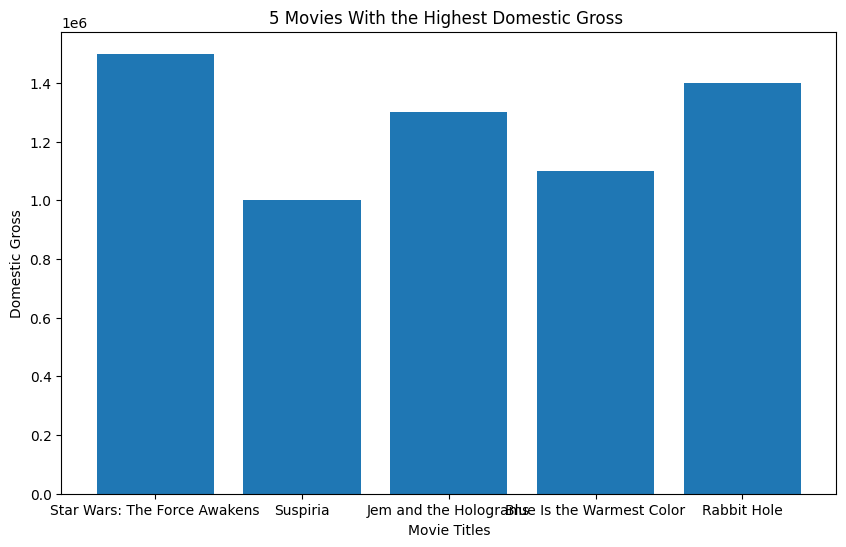

In [263]:
#plotting a graph with the movies with the higest domestic gross.
#getting the top five domestic gross profit that was accrued
top_domestic_gross = new_gross_df['domestic_gross'].value_counts().head(5).index.tolist()
top_domestic_gross

#getting the best movie titles that had highest domestic gross
top_title = new_gross_df['title'].value_counts().head(5).index.tolist()
top_title

#plotting title vs domestic gross in gross csv
bar_chart_title = '5 Movies With the Highest Domestic Gross '
bar_chart_movie_label = 'Movie Titles'
bar_chart_count_label = 'Domestic Gross'

plot_movie_analysis, ax = plt.subplots(figsize =(10,6))

plt.bar(top_title, top_domestic_gross)

#adding title to labels
plt.title(bar_chart_title)
plt.xlabel(bar_chart_movie_label)
plt.ylabel(bar_chart_count_label)

plt.show()

The above graph shows the relationship between the top five movie titles with the highest gross profit which indicate that action,science fiction and adventure movies return the highest domestic profit which are also the best to venture in. 

### 5.2 Basics_df

In [264]:
#selecting relevant columns in basics
#Creating a new dataframe with the selected columns.
new_basics_df = basics_df[['primary_name', 'known_for_titles']]
new_basics_df

KeyError: "None of [Index(['primary_name', 'known_for_titles'], dtype='object')] are in the [columns]"

In [ ]:
#sorting  values in basics based on known for titles
new_basics_df = new_basics_df.sort_values(by='known_for_titles', ascending=True)
new_basics_df

In [ ]:
#getting the best movie titles that had highest domestic gross
top_actors_names = new_basics_df['primary_name'].value_counts().head(5).index.tolist()
top_actors_names

#getting the best movie titles that had highest domestic gross
top_known_titles = new_basics_df['known_for_titles'].value_counts().head(5).index.tolist()
top_known_titles

#plotting title vs domestic gross in gross csv
bar_chart_title = 'Actors known for the best movie titles '
bar_chart_actor_names = 'Primary Name'
bar_chart_known_titles= 'Known For Titles'

plot_movie_analysis, ax = plt.subplots(figsize =(10,5))

plt.bar(top_actors_names, top_known_titles)

#adding title to labels
plt.title(bar_chart_title)
plt.xlabel(bar_chart_actor_names)
plt.ylabel(bar_chart_known_titles)

plt.show()

### 5.3 Ratings_df

In [287]:
#filtering ratings_df to have movie genres with more than 1500 number of votes
new_rating_df = ratings_and_basics.loc[ratings_and_basics['numvotes']>1500]
#sorting values and displaying top ten movies with more than 1500 votes
new_rating_df = new_rating_df.sort_values(by=['numvotes', 'averagerating'], ascending=False)[:10]
new_rating_df.reset_index()
#genres_ratings_df = basics_df.assign(genre=['Action,Crime,Drama', 'Comedy', 'Biography', 'Drama', 'Fantasy', ])
#genres = ['Action,Crime,Drama', 'Comedy', 'Biography', 'Drama', 'Fantasy']
#genre_ratings_df =genre_ratings_df.assign(genre=np.repeat(genres, 22447))

,index,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,2387,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
1,2241,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769
2,280,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334
3,12072,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405
4,325,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655
5,507,tt0993846,The Wolf of Wall Street,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama",8.2,1035358
6,1091,tt1130884,Shutter Island,Shutter Island,2010,138.0,"Mystery,Thriller",8.1,1005960
7,15327,tt2015381,Guardians of the Galaxy,Guardians of the Galaxy,2014,121.0,"Action,Adventure,Comedy",8.1,948394
8,2831,tt1431045,Deadpool,Deadpool,2016,108.0,"Action,Adventure,Comedy",8.0,820847
9,2523,tt1392170,The Hunger Games,The Hunger Games,2012,142.0,"Action,Adventure,Sci-Fi",7.2,795227


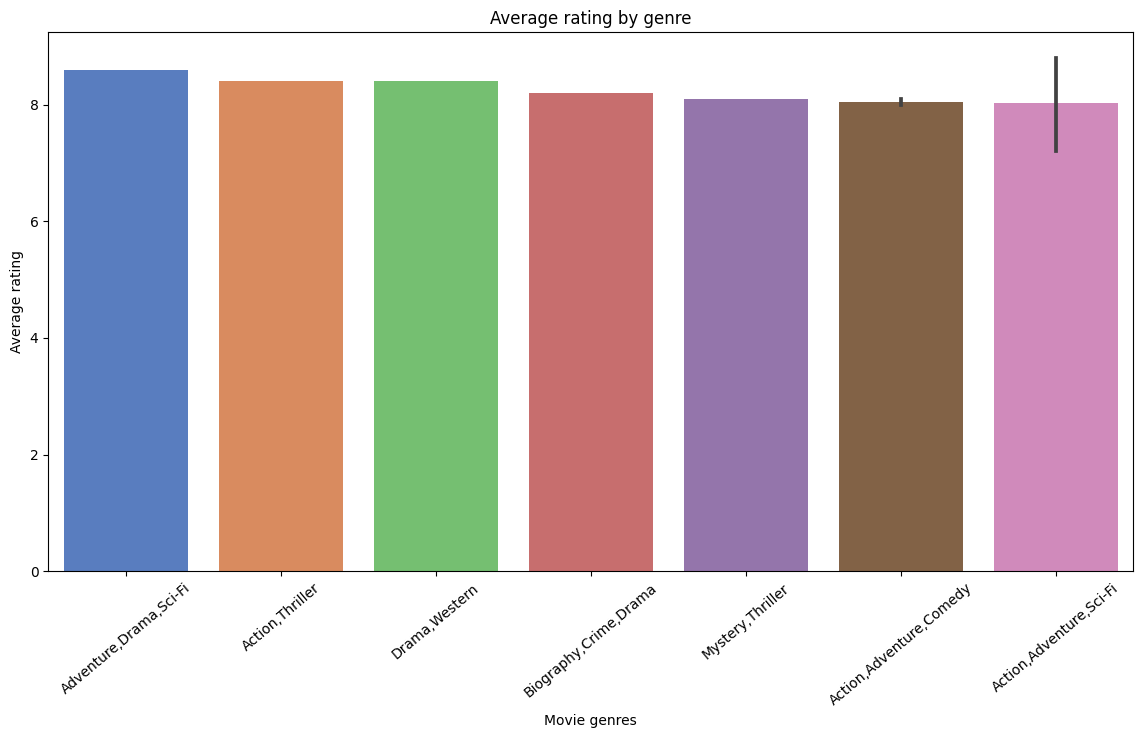

In [288]:
genre_ratings_df = new_rating_df.groupby('genres')['averagerating'].mean().sort_values(ascending = False)
fig, ax =plt.subplots(figsize=(14,7))
order_by = new_rating_df.groupby('genres')['averagerating'].mean().sort_values(ascending=False).index
sns.barplot(data =new_rating_df, x='genres', y='averagerating', palette='muted', order=order_by, ax=ax)
ax.set_title('Average rating by Genre')
ax.set_xlabel('Movie genres')
ax.set_ylabel('Average rating')
plt.xticks(rotation=40);

In [ ]:
genres_rating_df = ratings_df.groupby('genres')['averagerating'].mean().sort_values(ascending = False)
fig, ax =plt.subplots(figsize=(14,7))
order_by = ratings_df.groupby('genres')['averagerating'].mean().sort_values(ascending=False).index
sns.barplot(data =movies, x='genres', y= 'averagerating', palette='muted', order=order_by, ax=ax)
ax.set_title('Average rating by genre')
ax.set_ylabel('average rating')
plt.xticks(rotation=60);

In [ ]:
#plotting the graph with averagerating and title based on the number of votes.
numvotes = new_ratings_df['numvotes'].value_counts().head(5).index.tolist()
numvotes

#getting the top five movies average rating based on the number of votes
average_ratings = new_ratings_df['averagerating'].value_counts().head(5).index.tolist()
average_ratings

#plotting title vs domestic gross in gross csv
#bar_chart_title = 'Top Rated Movies With The Highest Number of Votes '
#bar_chart_movie_title = 'Number of Votes'
#bar_chart_average= 'Average Rating'

#plot_movie_analysis, ax = plt.hist(data, bins=5)

plt.hist('numvotes', 'average_ratings', bins =5)

#adding title to labels
plt.title('Relationship Between Number of Votes And Average Ratings')
plt.xlabel('Number of Votes')
plt.ylabel('Average Rating')

plt.show()

In [ ]:
#plotting the graph with averagerating and title based on the number of votes.
top_movie_titles = new_ratings_df['numvotes'].value_counts().head(5).index.tolist()
top_movie_titles

#getting the top five movies average rating based on the number of votes
average_ratings = new_ratings_df['averagerating'].value_counts().head(5).index.tolist()
average_ratings

#plotting title vs domestic gross in gross csv
bar_chart_title = 'Top Rated Movies With The Highest Number of Votes '
bar_chart_movie_title = 'Number of Votes'
bar_chart_average= 'Average Rating'

plot_movie_analysis, ax = plt.subplots(figsize =(10,10))

plt.bar(top_movie_titles, average_ratings)

#adding title to labels
plt.title(bar_chart_title)
plt.xlabel(bar_chart_movie_title)
plt.ylabel(bar_chart_average)

plt.show()

This shows the title of movies that were voted for with most people which influenced the ratings.
This also means that most people watched the movies.

# 6.Conclusions
 - Action, Science-fiction and adventure movies are the best to invest in for one to get more domestic gross income while drama movies have low domestic income
 - The number of people watching a movie will detamine the average rating of the movie from their votes.
 

# 7.Recommendation
